In [0]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2020-03-27 16:17:40--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.4.144, 2607:f8b0:4007:80b::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.4.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   385MB/s    in 0.2s    

2020-03-27 16:17:41 (385 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
# !rm -r cats_and_dogs_filtered.zip.2

In [0]:
!unzip cats_and_dogs_filtered.zip

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

In [0]:
import numpy as np
import cv2
import os
import random
import tqdm
import pickle

import matplotlib.pyplot as plt

In [0]:
train_DATADIR = "/content/cats_and_dogs_filtered/train"
test_DATADIR = "/content/cats_and_dogs_filtered/validation"
CATEGORIES = ['dogs', 'cats']

IMG_SIZE = 50

In [0]:
def load_my_data(datadir):
    training_data = []
    for category in CATEGORIES:
        path = os.path.join(datadir, category)
        class_num = CATEGORIES.index(category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except:
                pass

    random.shuffle(training_data)

    X = []
    y = []

    for features, labels in training_data:
        X.append(features)
        y.append(labels)

    X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

    return X, y

In [0]:
def save_data():
    X, y = load_my_data(train_DATADIR)
    pickle_out = open("X.pickle", "wb")
    pickle.dump(X, pickle_out)
    pickle_out.close()

    pickle_out = open("y.pickle", "wb") 
    pickle.dump(y, pickle_out)
    pickle_out.close()   

save_data()

In [0]:
def load_processed_data():
    pickle_in = open('X.pickle', 'rb')
    X = pickle.load(pickle_in)

    pickle_in = open('y.pickle', 'rb')
    y = pickle.load(pickle_in)

    return X, y

Run from below cell when processing **done**

In [0]:
X, y = load_processed_data()

In [0]:
print(X.shape)
y = np.array(y)

(2000, 50, 50, 1)


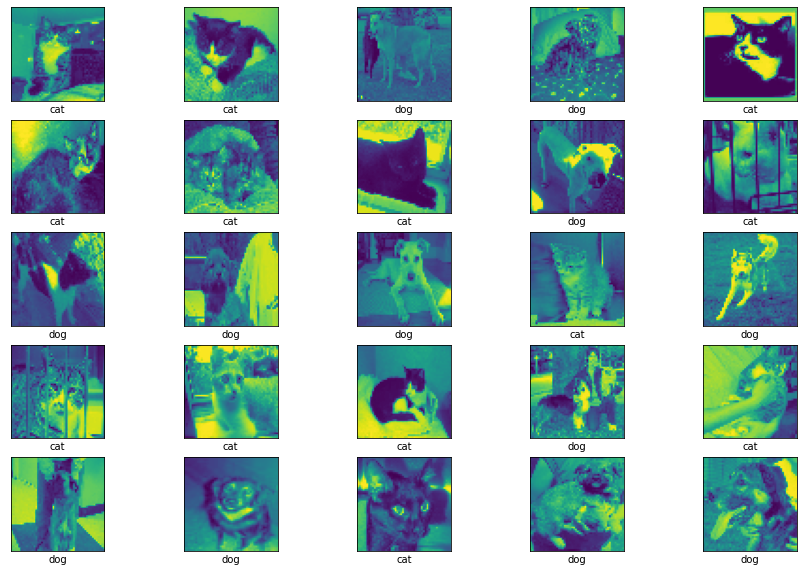

In [0]:
class_names = ['dog', 'cat']
plt.figure(figsize=(15, 10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tf.squeeze(X[i]), cmap=binary)
    plt.xlabel(class_names[y[i]])
plt.show()

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

In [0]:
tf.__version__

'2.2.0-rc1'

In [0]:
from tensorflow.keras import models, layers

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(256, (3,3), activation='relu', input_shape=X.shape[1:]))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 48, 48, 256)       2560      
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 24, 24, 256)       0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 22, 22, 64)        147520    
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 9, 9, 64)        

In [0]:
# opt = tf.keras.optimizers.Adam(learning_rate=1e-6)
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
X.shape, y.shape


((2000, 50, 50, 1), (2000,))

In [0]:
X_test, y_test = load_my_data(test_DATADIR)
y_test = np.array(y_test)

In [0]:
history = model.fit(X, y, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
63/63 [==============================] - 1s 23ms/step - loss: 2.3170 - accuracy: 0.5100 - val_loss: 0.6920 - val_accuracy: 0.5010
Epoch 2/20
63/63 [==============================] - 1s 21ms/step - loss: 0.6954 - accuracy: 0.5220 - val_loss: 0.7071 - val_accuracy: 0.5060
Epoch 3/20
63/63 [==============================] - 1s 21ms/step - loss: 0.6916 - accuracy: 0.5390 - val_loss: 0.6903 - val_accuracy: 0.5310
Epoch 4/20
63/63 [==============================] - 1s 22ms/step - loss: 0.6893 - accuracy: 0.5520 - val_loss: 0.6742 - val_accuracy: 0.6000
Epoch 5/20
63/63 [==============================] - 1s 21ms/step - loss: 0.6724 - accuracy: 0.5835 - val_loss: 0.6764 - val_accuracy: 0.5690
Epoch 6/20
63/63 [==============================] - 1s 21ms/step - loss: 0.6778 - accuracy: 0.5695 - val_loss: 0.6718 - val_accuracy: 0.5630
Epoch 7/20
63/63 [==============================] - 1s 21ms/step - loss: 0.6667 - accuracy: 0.6115 - val_loss: 0.6645 - val_accuracy: 0.5920
Epoch 8/20
63

Text(0, 0.5, 'Accuracy')

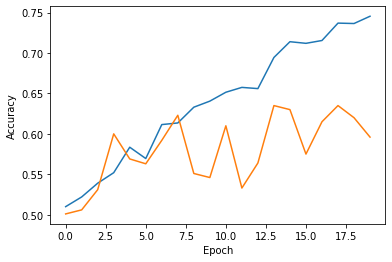

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [0]:
model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 6ms/step - loss: 0.7035 - accuracy: 0.5960


[0.703539252281189, 0.5960000157356262]

Text(0, 0.5, 'Loss')

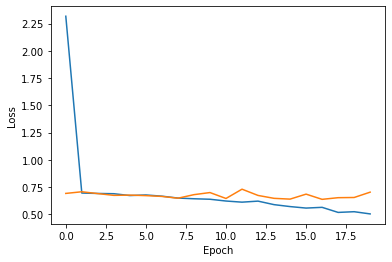

In [0]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')